## Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [84]:
# student 1: Daniel Podolsky 9104
# student 2: Eilon Ashkenazy 6837
# student 3: Gal Vaknin 4804
# student 4: Noy Klar 6981
# (optional) student 5:
# (optional) student 6:

## Part 2 - Experiments
You could add as many code cells as needed

In [85]:
# Imports
import pandas as pd
import numpy as np
import sklearn as scikit_learn # to check later how and where to use it
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [86]:
# Load up the train-set and the test-set:
train_set_df = pd.read_csv("wine_train.csv")
test_set_df = pd.read_csv("wine_test.csv")

In [87]:
# Print 5 rows of train-set database:
train_set_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [88]:
# Print 5 rows of test-set database:
test_set_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


In [89]:
# Notes:
# describe() returns a new dataframe containing statistics such as count, mean, standard deviation, minimum, and maximum values for each column.
# By default, df.describe() only includes columns with numeric data types, but it can also be used to include non-numeric columns
# by using the include parameter.
# The df.info() is used to print a concise summary of a DataFrame, including:
# -> The number of non-null values in each column
# -> The data type of each column
# -> The memory usage of the DataFrame


In [90]:
# 1st informatic table:
train_set_df.describe() # Stats about the train set 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


In [91]:
# 2nd informatic table:
test_set_df.describe() # Stats about the test set

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,13.013889,2.488611,2.385556,19.791667,98.944444,2.212778,1.893889,0.421667,1.705278,5.168056,0.953056,2.504444,764.388889,1.000000
std,0.904962,1.210778,0.238716,3.308550,16.626905,0.569845,0.974970,0.134302,0.678846,2.637680,0.264303,0.676096,309.252950,0.792825
min,11.030000,0.990000,1.950000,14.000000,70.000000,1.350000,0.470000,0.200000,0.410000,1.740000,0.560000,1.270000,315.000000,0.000000
25%,12.320000,1.670000,2.207500,16.950000,89.000000,1.725000,0.897500,0.290000,1.297500,3.292500,0.722500,1.990000,520.000000,0.000000
50%,13.110000,1.900000,2.310000,20.000000,96.000000,2.250000,1.940000,0.425000,1.690000,4.475000,0.975000,2.600000,680.000000,1.000000
75%,13.757500,3.202500,2.560000,22.000000,102.250000,2.755000,2.765000,0.530000,2.042500,6.337500,1.092500,2.932500,1001.250000,2.000000
max,14.830000,5.800000,2.920000,28.500000,162.000000,3.100000,3.400000,0.660000,3.280000,13.000000,1.710000,3.920000,1510.000000,2.000000


In [92]:
# 3rd informatic table:
correlation_matrix_test_set = test_set_df.corr()
correlation_matrix_test_set

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,-0.006626,-0.009440,-0.266216,0.162404,0.372485,0.206871,-0.390548,0.133561,0.569408,-0.254511,0.099016,0.561272,-0.283932
malic_acid,-0.006626,1.000000,0.041595,0.301608,-0.271036,-0.378490,-0.484559,0.277575,-0.357897,0.240793,-0.598088,-0.510999,-0.358937,0.593195
ash,-0.009440,0.041595,1.000000,0.537590,-0.053404,-0.030278,-0.113330,0.334431,-0.218353,0.218495,-0.106514,-0.164687,-0.034808,0.220407
alcalinity_of_ash,-0.266216,0.301608,0.537590,1.000000,-0.321763,-0.343779,-0.436390,0.527549,-0.183354,0.135088,-0.330198,-0.335409,-0.539902,0.576199
magnesium,0.162404,-0.271036,-0.053404,-0.321763,1.000000,0.235138,0.237704,-0.329042,0.491156,0.077021,0.147365,0.100646,0.420903,-0.188566
total_phenols,0.372485,-0.378490,-0.030278,-0.343779,0.235138,1.000000,0.839984,-0.592684,0.644847,0.001137,0.416623,0.612658,0.561005,-0.691855
flavanoids,0.206871,-0.484559,-0.113330,-0.436390,0.237704,0.839984,1.000000,-0.629779,0.630279,-0.306732,0.602698,0.805445,0.532763,-0.886365
nonflavanoid_phenols,-0.390548,0.277575,0.334431,0.527549,-0.329042,-0.592684,-0.629779,1.000000,-0.468201,0.055991,-0.194452,-0.583933,-0.687098,0.630578
proanthocyanins,0.133561,-0.357897,-0.218353,-0.183354,0.491156,0.644847,0.630279,-0.468201,1.000000,-0.025266,0.316147,0.496214,0.284267,-0.400272
color_intensity,0.569408,0.240793,0.218495,0.135088,0.077021,0.001137,-0.306732,0.055991,-0.025266,1.000000,-0.619902,-0.470412,0.199383,0.362468


In [93]:
# 4th informatic table:
correlation_matrix_train_set = train_set_df.corr()
correlation_matrix_train_set

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.125775,0.266255,-0.324234,0.308843,0.271331,0.247231,-0.088818,0.137788,0.538669,-0.009125,0.066571,0.668455,-0.342386
malic_acid,0.125775,1.000000,0.191182,0.282662,0.020063,-0.322301,-0.388624,0.287977,-0.185538,0.250443,-0.550526,-0.328693,-0.150744,0.392434
ash,0.266255,0.191182,1.000000,0.423830,0.378546,0.161905,0.164921,0.148841,0.065193,0.270956,-0.067239,0.040355,0.275818,-0.109604
alcalinity_of_ash,-0.324234,0.282662,0.423830,1.000000,-0.011331,-0.314082,-0.328843,0.316834,-0.210546,-0.016108,-0.258432,-0.260420,-0.419231,0.502200
magnesium,0.308843,0.020063,0.378546,-0.011331,1.000000,0.209336,0.182837,-0.232630,0.145813,0.244744,0.021679,0.054141,0.388856,-0.215107
total_phenols,0.271331,-0.322301,0.161905,-0.314082,0.209336,1.000000,0.869634,-0.414451,0.625767,-0.068393,0.442778,0.716507,0.488763,-0.726069
flavanoids,0.247231,-0.388624,0.164921,-0.328843,0.182837,0.869634,1.000000,-0.515106,0.680019,-0.133475,0.529995,0.781781,0.489195,-0.838060
nonflavanoid_phenols,-0.088818,0.287977,0.148841,0.316834,-0.232630,-0.414451,-0.515106,1.000000,-0.382196,0.164591,-0.293616,-0.481035,-0.229793,0.455551
proanthocyanins,0.137788,-0.185538,0.065193,-0.210546,0.145813,0.625767,0.680019,-0.382196,1.000000,-0.028767,0.291350,0.546202,0.345552,-0.542524
color_intensity,0.538669,0.250443,0.270956,-0.016108,0.244744,-0.068393,-0.133475,0.164591,-0.028767,1.000000,-0.487257,-0.419104,0.350029,0.236329


In [94]:
# For our first two visualizations, we are going to use Heatmaps.
# 1. Red color with a value of 1 means perfect positive correletion.
# 2:
#    2.1: +1: Perfect positive correlation. As one variable increases, the other variable also increases proportionally.
#    2.2: -1: Perfect negative correlation. As one variable increases, the other variable decreases proportionally.
#.   2.3: 0: No correlation. The variables do not show any linear relationship.
# 3: 
#    3.1: Red in a correlation heatmap typically represents a positive correlation. 
#    3.2: The intensity of the color indicates the strength of the correlation.
#    3.3: Deep red or dark red corresponds to a correlation close to +1.
# 4:
#.  4.1: When the correlation value is exactly 1, it usually indicates that the variables are perfectly correlated.
#.  4.2: In practical terms, this often happens when you are looking at the correlation of a variable with itself, resulting in the correlation being 1 on the diagonal of the matrix.
#.  4.3: If the value is 1 for two different variables, it might indicate that they are perfectly linearly related or that one is a multiple of the other (a sign of potential redundancy).

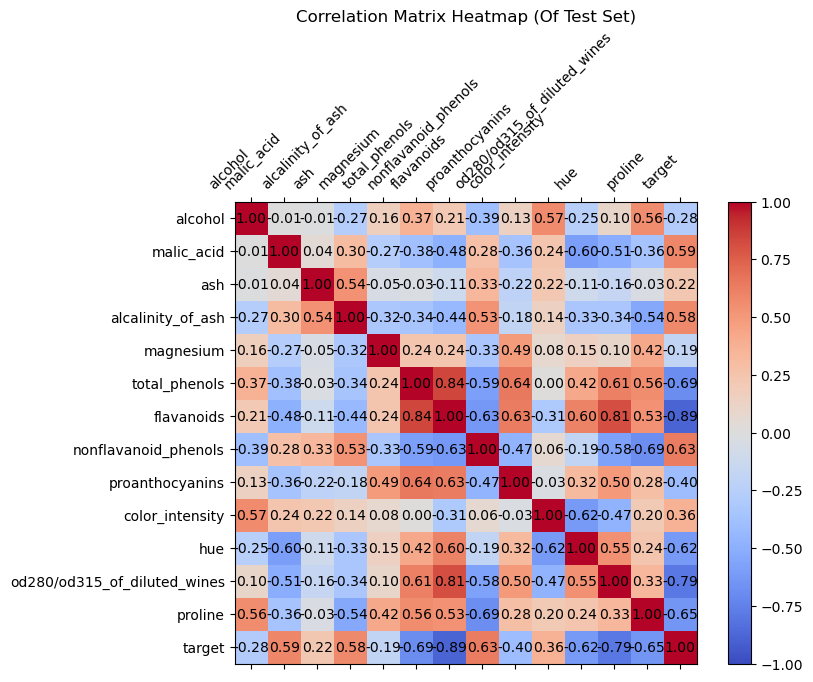

In [95]:
# 1st visualization:
# Plot heatmap for test set
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(correlation_matrix_test_set, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ax.set_xticks(np.arange(len(correlation_matrix_test_set.columns)))
ax.set_yticks(np.arange(len(correlation_matrix_test_set.columns)))
ax.set_xticklabels(correlation_matrix_test_set.columns, rotation=45, ha='right')
ax.set_yticklabels(correlation_matrix_test_set.columns)
for (i, j), val in np.ndenumerate(correlation_matrix_test_set):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')
plt.title('Correlation Matrix Heatmap (Of Test Set)')
plt.show()

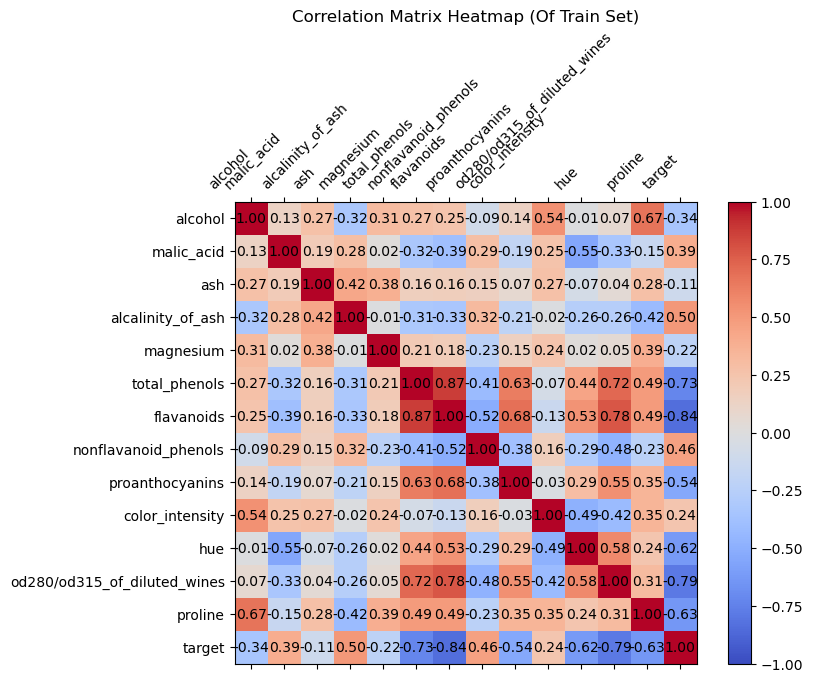

In [96]:
# 2nd visualization:
# Plot heatmap for train set
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(correlation_matrix_train_set, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ax.set_xticks(np.arange(len(correlation_matrix_train_set.columns)))
ax.set_yticks(np.arange(len(correlation_matrix_train_set.columns)))
ax.set_xticklabels(correlation_matrix_train_set.columns, rotation=45, ha='right')
ax.set_yticklabels(correlation_matrix_train_set.columns)
for (i, j), val in np.ndenumerate(correlation_matrix_train_set):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')
plt.title('Correlation Matrix Heatmap (Of Train Set)')
plt.show()

In [97]:
# 3rd visualization:
# We can see the different instances of our final target value.
# The .value_counts() method in pandas is used to count the unique values in a Series or DataFrame.


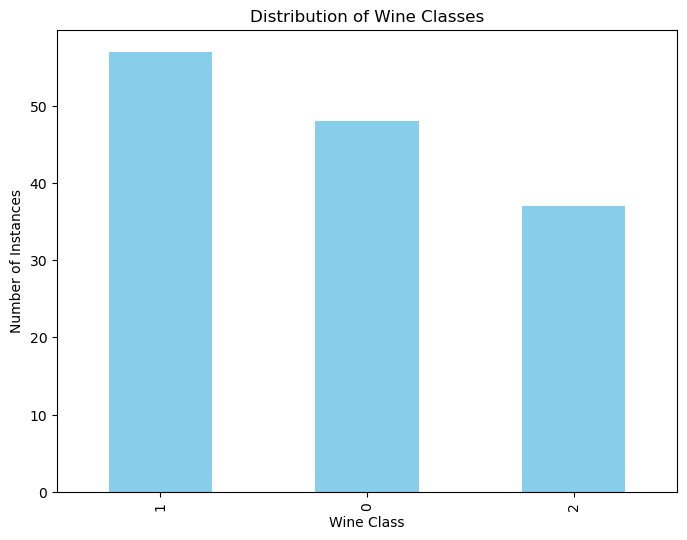

In [98]:
# Count the number of instances for each class
target_counts = train_set_df['target'].value_counts()

# Bar plot for target distribution
plt.figure(figsize=(8, 6))
target_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Wine Class')
plt.ylabel('Number of Instances')
plt.title('Distribution of Wine Classes')
plt.show()

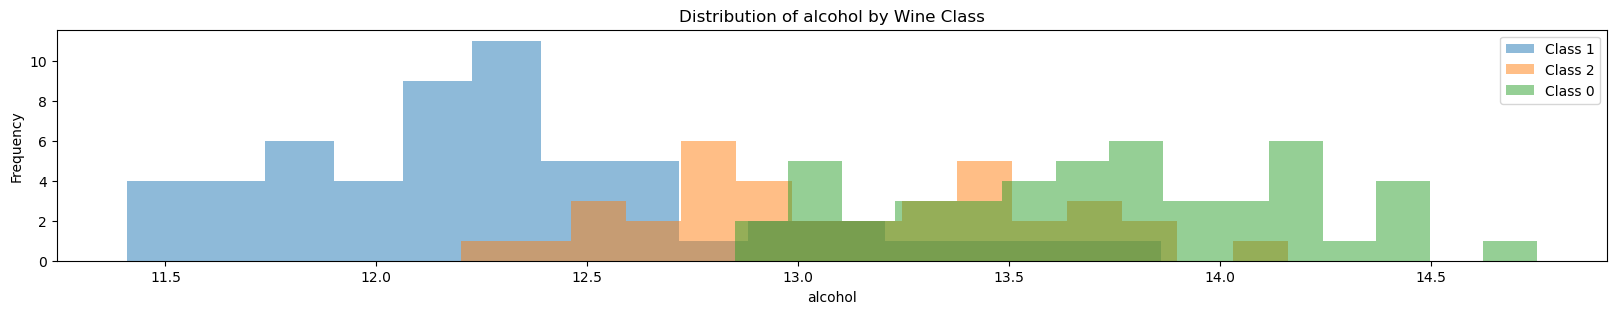

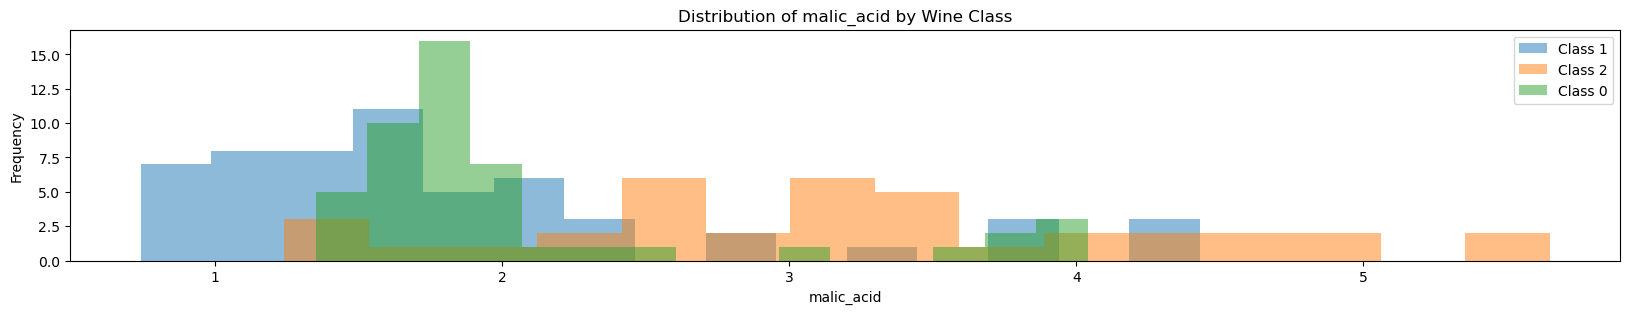

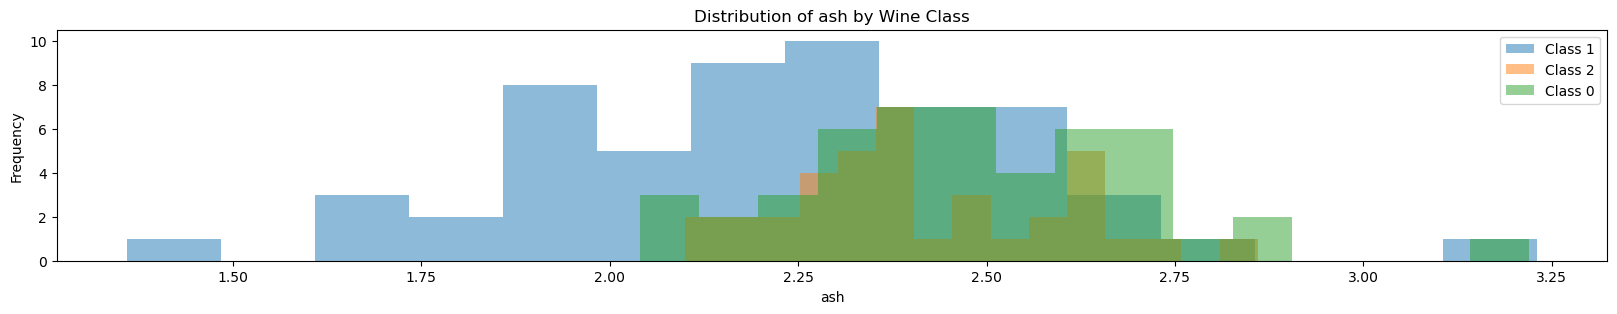

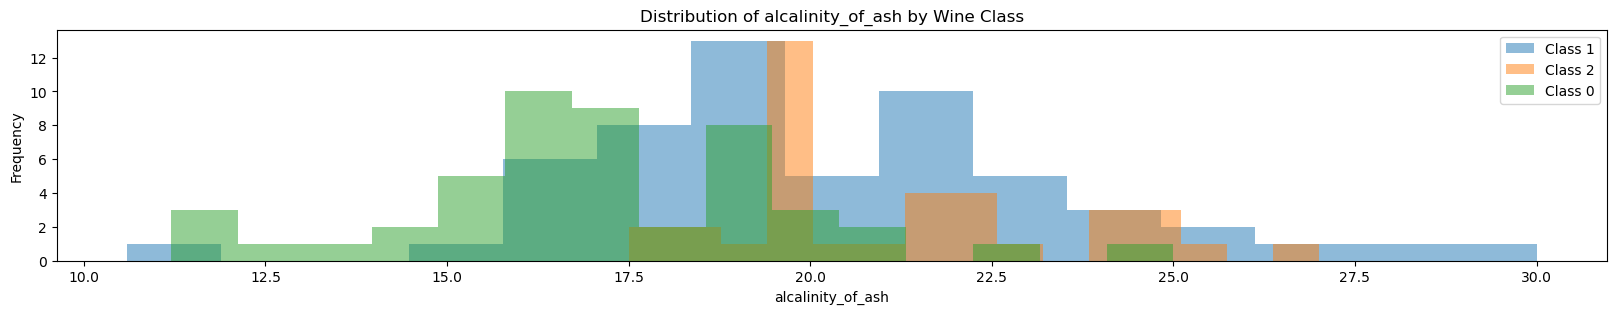

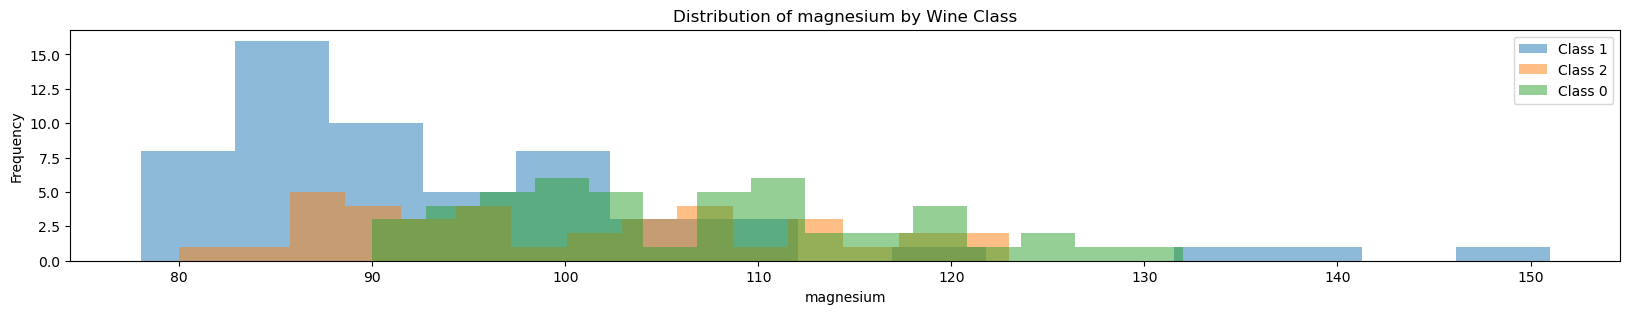

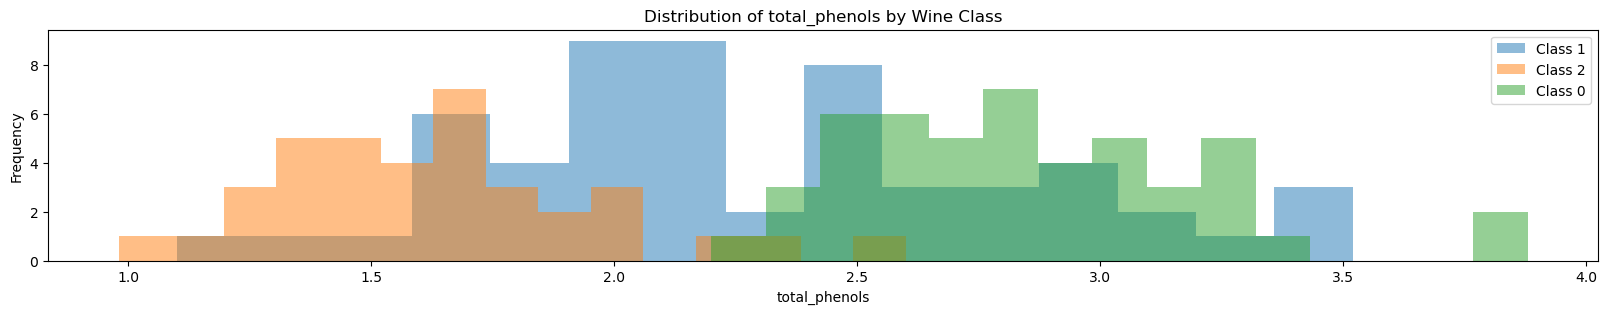

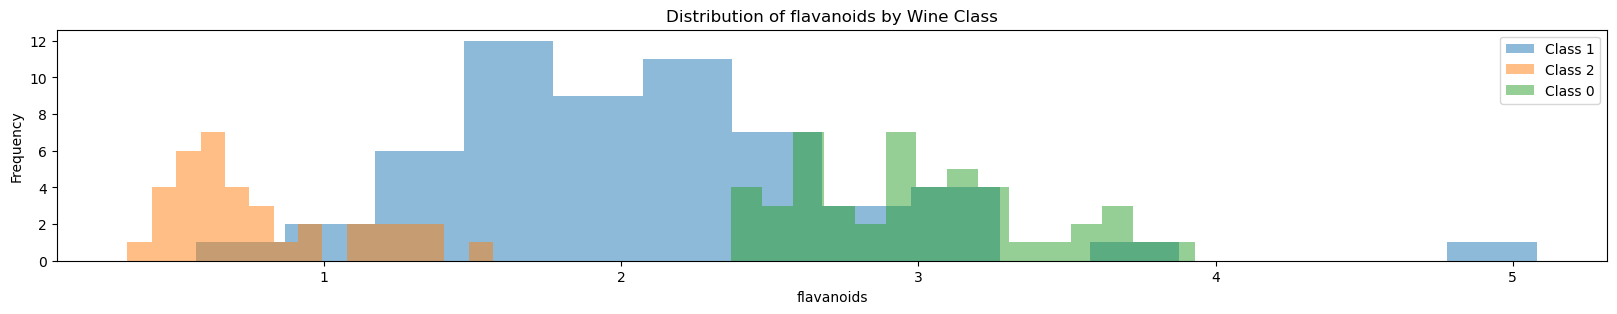

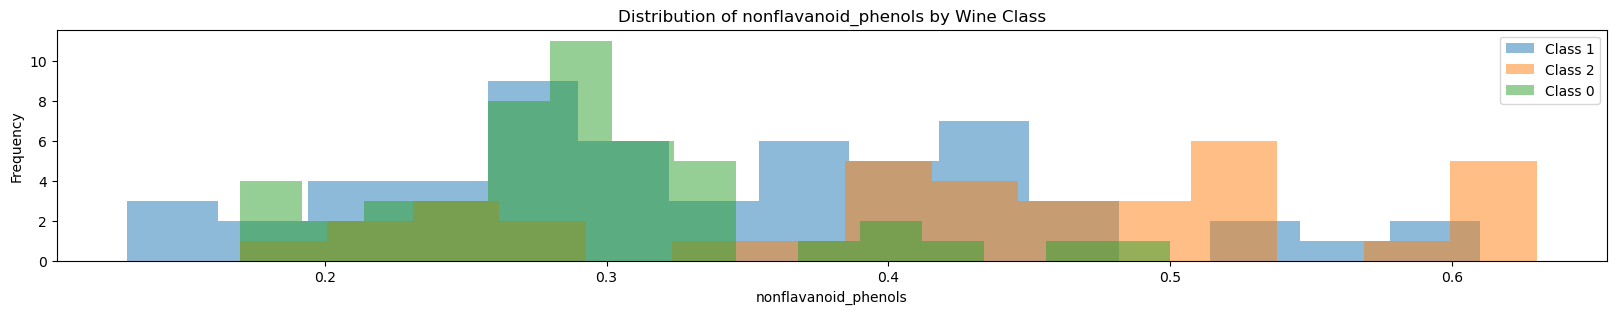

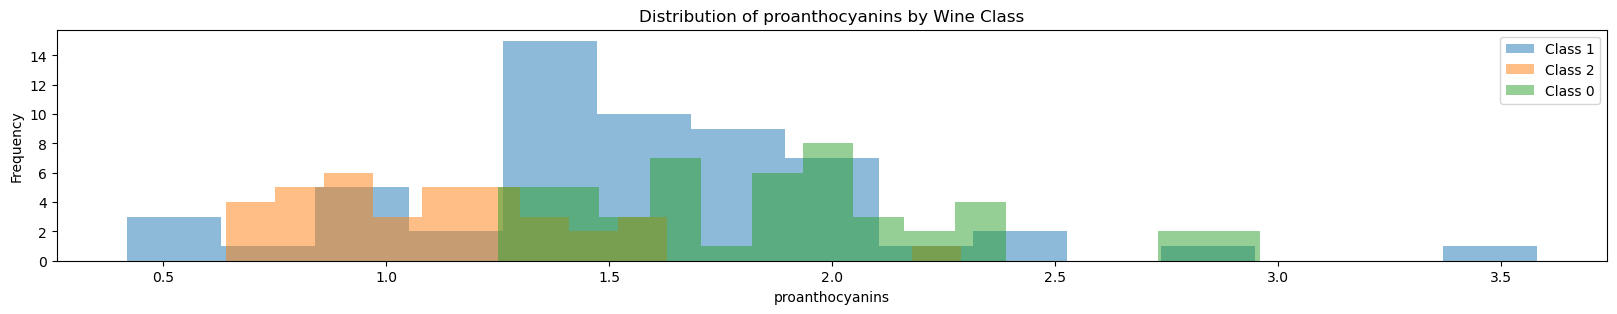

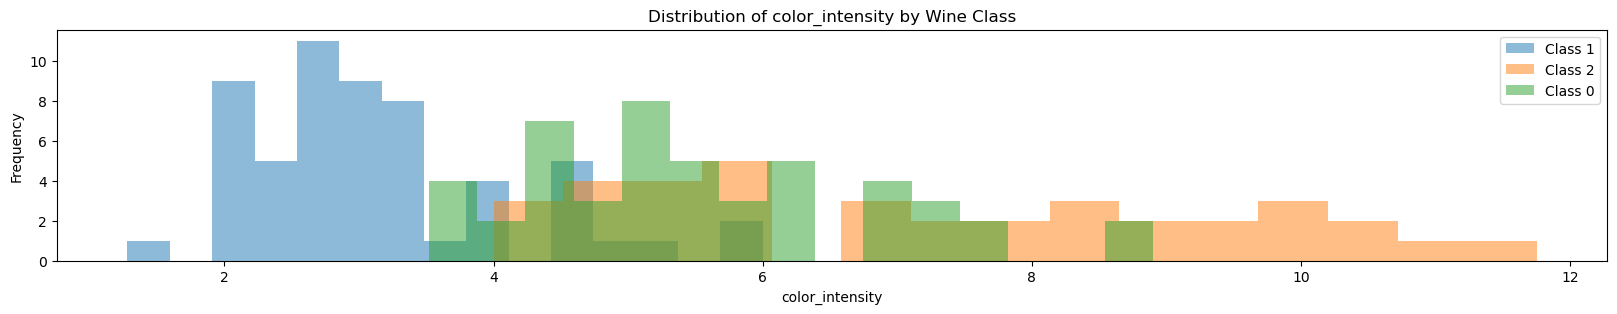

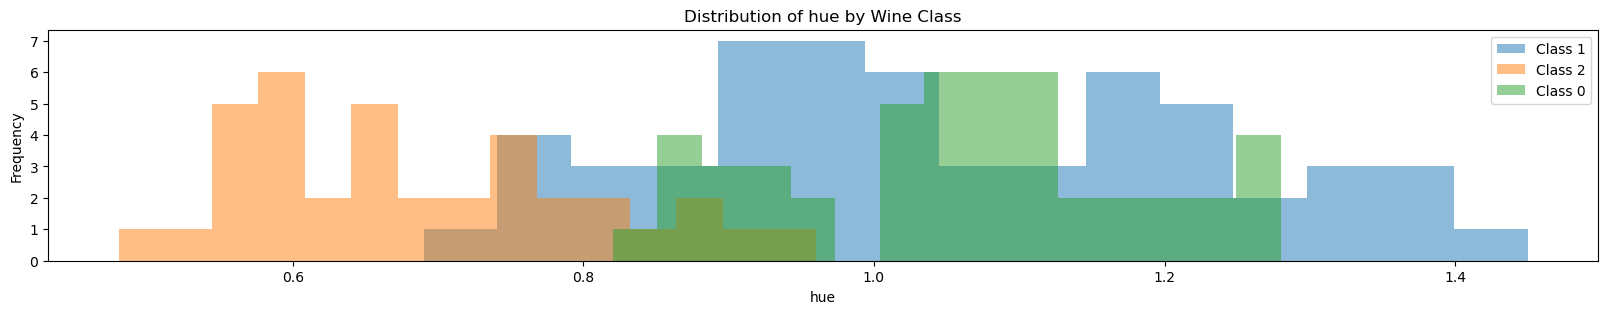

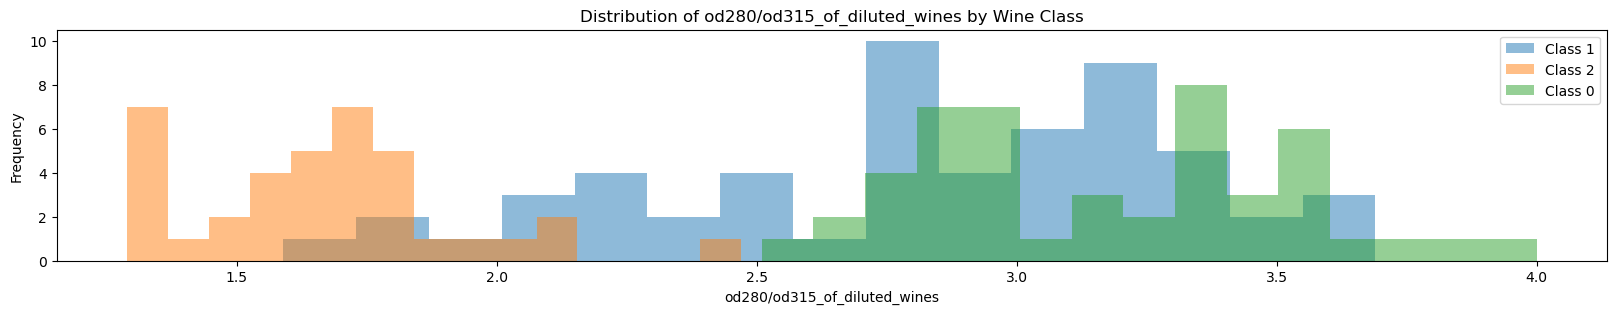

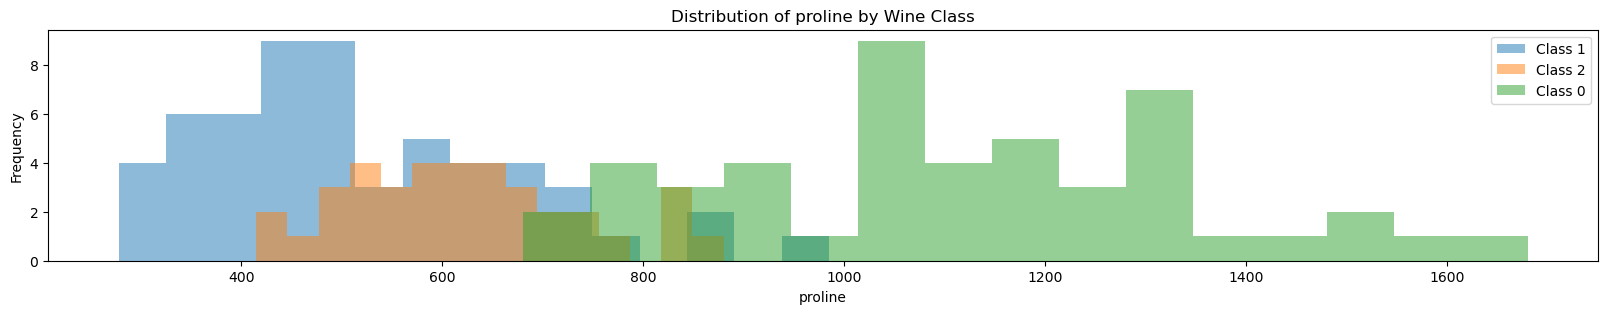

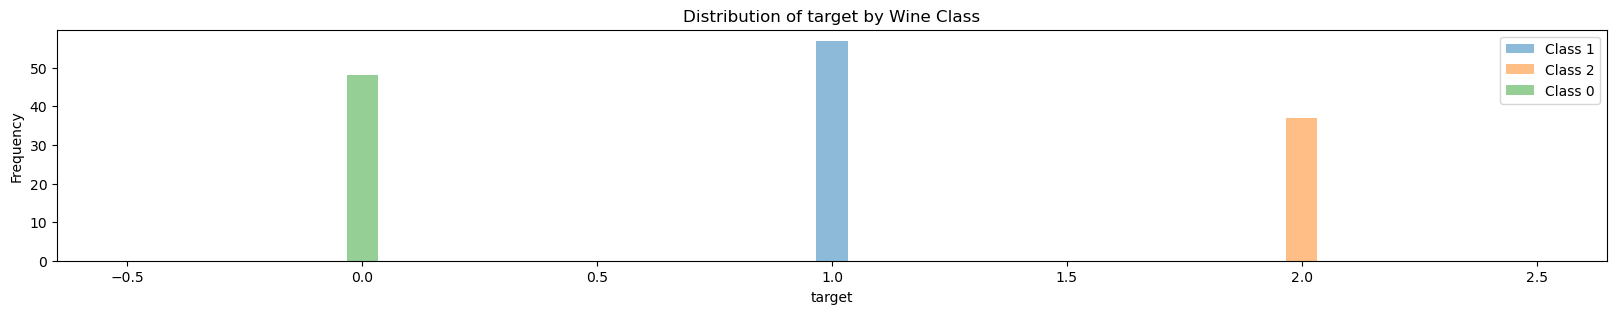

In [99]:
# 4th visualization:
for feature in train_set_df.columns.tolist():
    plt.figure(figsize=(20, 3))
    for label in train_set_df['target'].unique():
        subset = train_set_df[train_set_df['target'] == label]
        plt.hist(subset[feature], bins=15, alpha=0.5, label=f'Class {label}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature} by Wine Class')
    plt.legend()
    plt.show()

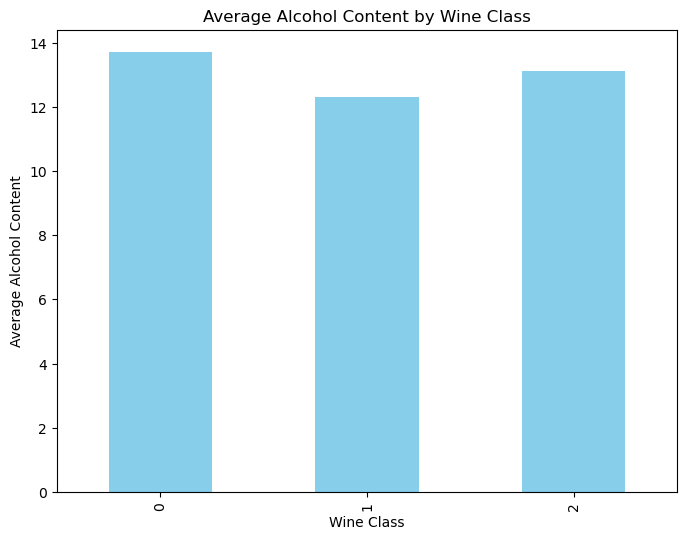

In [100]:
# 5th visualization:
# Average feature values by class
avg_features = train_set_df.groupby('target').mean()

# Bar plot of average 'Alcohol' by class
plt.figure(figsize=(8, 6))
avg_features['alcohol'].plot(kind='bar', color='skyblue')
plt.xlabel('Wine Class')
plt.ylabel('Average Alcohol Content')
plt.title('Average Alcohol Content by Wine Class')
plt.show()


In [101]:
# Now let's talk about Feature Enginnering

# 1st feature engineering metric - Min-Max Scaling (Normalization):
# Min-Max Scaling scales features to a fixed range, typically [0, 1].

# First, save Y Label.
target = train_set_df['target']
target_test = test_set_df['target']

# מפרידים את התכונות
features_train = train_set_df.drop(columns=['target'])
features_test = test_set_df.drop(columns=['target']) # We will use both of them in the scaling process.

In [102]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler()

# Apply Min-Max Scaling
X_train_minmax = min_max_scaler.fit_transform(features_train)
X_test_minmax = min_max_scaler.transform(features_test)

# Restore the dataframe, but scaled.
minmax_scaled_data_train = pd.DataFrame(X_train_minmax, columns=features_train.columns)
minmax_scaled_data_test = pd.DataFrame(X_test_minmax, columns=features_test.columns)
#minmax_scaled_data_train['target'] = target.reset_index(drop=True)
#minmax_scaled_data_test['target'] = target.reset_index(drop=True)

minmax_scaled_data_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.200599,0.221996,0.513369,0.407216,0.041096,0.213793,0.244726,0.78,0.386076,0.106972,0.618557,0.361624,0.144080
1,0.649701,0.374745,0.711230,0.716495,0.369863,0.196552,0.105485,0.52,0.354430,0.704871,0.268041,0.188192,0.336662
2,0.287425,0.040733,0.000000,0.000000,0.136986,0.344828,0.048523,0.30,0.000000,0.063992,0.587629,0.195572,0.172611
3,0.122754,0.199593,0.278075,0.458763,0.109589,0.524138,0.274262,0.48,0.316456,0.074499,0.474227,0.424354,0.097718
4,0.523952,0.576375,0.422460,0.536082,0.328767,0.179310,0.044304,0.60,0.278481,0.259790,0.123711,0.143911,0.393723


In [103]:
# 2nd feature engineering metric - Standardization:
# Standardization centers the data around 0 with a standard deviation of 1.

In [104]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
standard_scaler = StandardScaler()

# Apply Standardization to your dataset
X_train_standardized = standard_scaler.fit_transform(features_train)
X_test_standardized = standard_scaler.transform(features_test)

# Restore the dataframe, but scaled.
standard_scaled_data_train = pd.DataFrame(X_train_standardized, columns=features_train.columns)
standard_scaled_data_test = pd.DataFrame(X_test_standardized, columns=features_test.columns)
standard_scaled_data_train['target'] = target.reset_index(drop=True)
standard_scaled_data_test['target'] = target.reset_index(drop=True)

standard_scaled_data_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,-1.165293,-0.429338,-0.147716,-0.275119,-1.389292,-1.123620,-0.562603,1.479415,0.144876,-1.178572,0.554869,-0.515510,-0.830216,1
1,0.740330,0.259077,1.163262,1.519686,0.370822,-1.202087,-1.221446,0.369703,-0.040628,1.626473,-0.998662,-1.172348,0.023858,2
2,-0.796872,-1.246256,-3.549173,-2.638279,-0.875925,-0.527274,-1.490973,-0.569283,-2.118278,-1.380213,0.417793,-1.144397,-0.703687,1
3,-1.495601,-0.530305,-1.706717,0.024015,-1.022601,0.288779,-0.422849,0.198979,-0.263233,-1.330923,-0.084820,-0.277931,-1.035826,1
4,0.206756,1.167784,-0.750057,0.472716,0.150808,-1.280554,-1.510938,0.711153,-0.485839,-0.461628,-1.638351,-1.340051,0.276917,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0.257572,-0.475232,-0.785489,-2.458798,0.004132,0.524179,0.695187,-0.740008,-0.522940,-0.291353,0.417793,1.063695,0.972829,0
138,1.515283,-0.649631,0.419194,-0.873387,0.590836,1.544246,1.863136,-0.227834,0.552986,1.644397,1.240251,0.253130,2.965668,0
139,-1.165293,-1.071858,0.525489,1.370119,-1.609306,-0.495887,-0.482744,0.455066,-0.300334,-1.268190,1.605788,0.113377,-0.355731,1
140,1.527987,-0.493590,0.312898,-1.262262,0.884189,1.497166,1.324083,-0.057109,0.757041,0.770621,0.417793,0.295055,2.238124,0


In [105]:
# 3rd feature engineering metric - Quantization:
# Quantization discretizes continuous features into a fixed number of bins.
# Uses for quantization:
# 1. Quantization can simplify complex distributions of continuous features into a smaller set of discrete values, making it easier for models to learn patterns and relationships.
# 2. By grouping similar values into bins, quantization can reduce the impact of noise and outliers in the data, leading to more robust models.

In [106]:
from sklearn.preprocessing import KBinsDiscretizer

# Initialize KBinsDiscretizer
quantizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

# Apply Quantization to your dataset
X_train_quantized = quantizer.fit_transform(features_train)
X_test_quantized = quantizer.transform(features_test)

# Restore the dataframe, but scaled.
quantized_scaled_data_train = pd.DataFrame(X_train_quantized, columns=features_train.columns)
qunatized_scaled_data_test = pd.DataFrame(X_test_quantized, columns=features_test.columns)
#quantized_scaled_data_train['target'] = target.reset_index(drop=True)
#standard_scaled_data_test['target'] = target.reset_index(drop=True)

quantized_scaled_data_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,2.0,2.0,5.0,4.0,0.0,2.0,2.0,7.0,3.0,1.0,6.0,3.0,1.0
1,6.0,3.0,7.0,7.0,3.0,1.0,1.0,5.0,3.0,7.0,2.0,1.0,3.0
2,2.0,0.0,0.0,0.0,1.0,3.0,0.0,3.0,0.0,0.0,5.0,1.0,1.0
3,1.0,1.0,2.0,4.0,1.0,5.0,2.0,4.0,3.0,0.0,4.0,4.0,0.0
4,5.0,5.0,4.0,5.0,3.0,1.0,0.0,5.0,2.0,2.0,1.0,1.0,3.0


In [107]:
# Now let's talk about Feature Selection
# We want to eliminate any features that may hurt our prediction accuracy!
# So for that, we will use "Univariate Feature Selection".

# Univariate feature selection is a statistical method used to select the most relevant features based on univariate statistical tests.
# It evaluates each feature independently with the target variable and selects the features that have the strongest relationship with the target.
from sklearn.feature_selection import SelectKBest, f_classif
# Initialize SelectKBest with the scoring function (e.g., f_classif for classification)
selector = SelectKBest(score_func=f_classif, k=10)

# Perform feature selection on the training data
X_train_selected = selector.fit_transform(quantized_scaled_data_train, target)

# Transform the test data using the same selector
X_test_selected = selector.transform(qunatized_scaled_data_test)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = quantized_scaled_data_train.columns[selected_feature_indices]

# Create a DataFrame with the selected features
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_feature_names)

X_train_selected_df

# And as we can see, we got 3 columns eliminated!

,alcohol,malic_acid,alcalinity_of_ash,total_phenols,flavanoids,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,2.0,2.0,4.0,2.0,2.0,3.0,1.0,6.0,3.0,1.0
1,6.0,3.0,7.0,1.0,1.0,3.0,7.0,2.0,1.0,3.0
2,2.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,1.0,1.0
3,1.0,1.0,4.0,5.0,2.0,3.0,0.0,4.0,4.0,0.0
4,5.0,5.0,5.0,1.0,0.0,2.0,2.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
137,5.0,2.0,0.0,5.0,5.0,2.0,2.0,5.0,7.0,5.0
138,8.0,1.0,3.0,8.0,7.0,4.0,7.0,7.0,5.0,9.0
139,2.0,0.0,6.0,3.0,2.0,3.0,0.0,8.0,5.0,2.0
140,8.0,2.0,2.0,7.0,6.0,4.0,5.0,5.0,5.0,8.0


In [108]:
# Now, let's select some models and test our accuracy before selecting the important columns and after:
# First, the imports :)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Secondly, we will look at the accuracy without Feature Selection and right after we will compare using Feature Selection.

In [109]:
# Decision Trees:
# Train Decision Tree Classifier
# We will train our three-different scaled dataframes from before.
# Our Hyper Parameters For The Decision Tree:
#     1. min_samples_split: controls the minimum number of samples required to split an internal node.
#                           If a node has fewer samples than min_samples_split, further splitting is halted.
#     2. max_depth: Maximum depth of the tree. Limits the maximum number of levels in the decision tree.

# Decision Tree with MinMaxScaling:
dt_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=2)
dt_classifier.fit(X_train_minmax, target)

# Predict and calculate accuracy for Decision Tree with MinMaxScaling
dt_predictions = dt_classifier.predict(X_test_minmax)
dt_accuracy = accuracy_score(target_test, dt_predictions)
print("Decision Tree Accuracy with MinMaxScaling and before Feature Selection:", dt_accuracy)

# Decision Tree with Standardization Scaling:
dt_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=2)
dt_classifier.fit(X_train_standardized, target)

# Predict and calculate accuracy for Decision Tree with Standardization
dt_predictions = dt_classifier.predict(X_test_standardized)
dt_accuracy = accuracy_score(target_test, dt_predictions)
print("Decision Tree Accuracy with Standarization and before Feature Selection:", dt_accuracy)


# Decision Tree with Qunatization Scaling:
dt_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=2)
dt_classifier.fit(X_train_quantized, target)

# Predict and calculate accuracy for Decision Tree with Qunatization
dt_predictions = dt_classifier.predict(X_test_quantized)
dt_accuracy = accuracy_score(target_test, dt_predictions)
print("Decision Tree Accuracy with Qunatization and before Feature Selection:", dt_accuracy)

Decision Tree Accuracy with MinMaxScaling and before Feature Selection: 0.9166666666666666
Decision Tree Accuracy with Standarization and before Feature Selection: 0.9166666666666666
Decision Tree Accuracy with Qunatization and before Feature Selection: 0.9166666666666666


In [110]:
# Now, let's use Feature Selection!
# We will select the top features on all three different scaled dataframes:

In [111]:
selector = SelectKBest(score_func=f_classif, k=12)


# Feature Selection on MinMax:
X_train_minmax_selected = selector.fit_transform(X_train_minmax, target)
X_test_minmax_selected = selector.transform(X_test_minmax)
selected_feature_indices = selector.get_support(indices=True)

# Reperform Decision Tree with MinMax: (But this time, with selected features, that means we removed "hurting" features)

dt_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=2)
dt_classifier.fit(X_train_minmax_selected, target)

# Predict and calculate accuracy for Decision Tree with MinMaxScaling
dt_predictions = dt_classifier.predict(X_test_minmax_selected)
dt_accuracy = accuracy_score(target_test, dt_predictions)
print("Decision Tree Accuracy with MinMaxScaling and *after* Feature Selection:", dt_accuracy)

# Feature Selection on Standardization:
X_train_standardization_selected = selector.fit_transform(X_train_standardized, target)
X_test_standarization_selected = selector.transform(X_test_standardized)
selected_feature_indices = selector.get_support(indices=True)

# Reperform Decision Tree with Standarization: (But this time, with selected features, that means we removed "hurting" features)
dt_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=2)
dt_classifier.fit(X_train_standardization_selected, target)

# Predict and calculate accuracy for Decision Tree with Standardization
dt_predictions = dt_classifier.predict(X_test_standarization_selected)
dt_accuracy = accuracy_score(target_test, dt_predictions)
print("Decision Tree Accuracy with Standarization and *after* Feature Selection:", dt_accuracy)

# Feature Selection on Quantization:
X_train_qunatized_selected = selector.fit_transform(X_train_quantized, target)
X_test_qunatized_selected = selector.transform(X_test_quantized)
selected_feature_indices = selector.get_support(indices=True)

# Reperform Decision Tree with Quantization: (But this time, with selected features, that means we removed "hurting" features)
dt_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=2)
dt_classifier.fit(X_train_qunatized_selected, target)

# Predict and calculate accuracy for Decision Tree with Standardization
dt_predictions = dt_classifier.predict(X_test_qunatized_selected)
dt_accuracy = accuracy_score(target_test, dt_predictions)
print("Decision Tree Accuracy with Quantization and *after* Feature Selection:", dt_accuracy)

# We can see that nothing has really changed that much, if at all.

Decision Tree Accuracy with MinMaxScaling and *after* Feature Selection: 0.8888888888888888
Decision Tree Accuracy with Standarization and *after* Feature Selection: 0.8888888888888888
Decision Tree Accuracy with Quantization and *after* Feature Selection: 0.8888888888888888


In [112]:
# For sanity reasons, let's continue to the next model but with Feature Selected, Standardization Scaled information.

In [114]:
# Our next model is K-NN.
# Train k-Nearest Neighbors Classifier with hyperparameters

# 1
# Let's try with weights = distance.
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_classifier.fit(X_train_standardization_selected, target)

# Predict and calculate accuracy for k-NN
knn_predictions = knn_classifier.predict(X_test_standarization_selected)
knn_accuracy = accuracy_score(target_test, knn_predictions)
print("k-NN Accuracy with weights = distance:", knn_accuracy)

# 2
# Let's try with weights = uniform
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_classifier.fit(X_train_standardization_selected, target)

# Predict and calculate accuracy for k-NN
knn_predictions = knn_classifier.predict(X_test_standarization_selected)
knn_accuracy = accuracy_score(target_test, knn_predictions)
print("k-NN Accuracy with weights = uniform:", knn_accuracy)

# 3
# Now let's try weights = uniform and metric = euclidean
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric="euclidean")
knn_classifier.fit(X_train_standardization_selected, target)

# Predict and calculate accuracy for k-NN
knn_predictions = knn_classifier.predict(X_test_standarization_selected)
knn_accuracy = accuracy_score(target_test, knn_predictions)
print("k-NN Accuracy with weights = uniform and metric = euclidean:", knn_accuracy)

# As we can see, the accuracy has gone drastically up nevertheless!

k-NN Accuracy with weights = distance: 0.9722222222222222
k-NN Accuracy with weights = uniform: 0.9722222222222222
k-NN Accuracy with weights = uniform and metric = euclidean: 0.9722222222222222


In [115]:
# One more model is Naive-Bayes.
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_standardization_selected, target)

# Predict and calculate accuracy for Naive Bayes
nb_predictions = nb_classifier.predict(X_test_standarization_selected)
nb_accuracy = accuracy_score(target_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 1.0


In [116]:
# And the last one is Neural Networks.
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

nn_classifier = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.0001, 
                              batch_size='auto', learning_rate='constant', learning_rate_init=0.001, 
                              max_iter=200, shuffle=True, random_state=42)
nn_classifier.fit(X_train_standardization_selected, target)

# Predict and calculate accuracy for Neural Network
nn_predictions = nn_classifier.predict(X_test_standarization_selected)
nn_accuracy = accuracy_score(target_test, nn_predictions)
print("Neural Network Accuracy:", nn_accuracy)

Neural Network Accuracy: 0.9722222222222222


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [117]:
# In conclusion, Naive Bayes got us the highest accuracy!

In [118]:
# Now, let's check for the best permutation using 5-fold-cross-validation and grid search.
# We need to get the best result depending on the f1 score.
# First things first, the imports:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import StratifiedKFold, train_test_split

# To prevent overfitting, we need to use Validation Set.
# On our validation set, we will perform the accuracy tests and see what hyper-parameters with what model gives us the best result!.
target_standard_scaled = standard_scaled_data_train['target']

# מפרידים את התכונות
features_train_standard_scaled = standard_scaled_data_train.drop(columns=['target'])
X_train_main, X_validation_main, Y_train_main, Y_validation_main = train_test_split(features_train_standard_scaled, target_standard_scaled, test_size = 0.2, random_state = 42)
X_validation_main

# Perfect, now we can continue to test the accuracy on the Validation Set which is X_validation_main.

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
131,-1.749684,-0.282476,-0.289443,-0.424686,-0.142544,1.104833,0.196064,-1.508270,-0.393087,-0.797695,0.920406,0.448783,-1.257253
19,0.918188,-0.796492,0.490057,-0.813561,0.590836,1.701179,1.603592,-1.337545,0.886894,0.793025,-0.313280,0.323006,1.716190
81,-0.619014,-0.970891,-0.395739,-0.574253,-1.095939,-0.495887,-1.480990,2.162314,-0.578591,0.188103,-0.952970,-1.577631,-0.292466
96,-1.050956,-0.778135,0.596353,-0.125552,0.297484,-0.668514,-0.313042,0.881878,-0.986701,-0.932122,2.245477,-0.571411,-1.225621
56,0.575176,1.287109,0.844376,1.070985,0.810850,-0.966687,-1.141586,0.711153,-0.189032,2.531615,-0.496049,-1.507754,-0.150120
12,1.350129,-0.135614,0.879808,-0.544340,1.544231,0.445713,0.445626,-0.313196,-0.578591,0.008867,0.463485,1.315250,1.747822
98,-1.216109,1.837840,0.064875,0.771850,-1.462630,-0.338954,-0.313042,0.625791,-0.393087,-1.088954,-0.770201,-0.096252,-0.513892
65,1.553396,-0.548663,-0.218580,-0.933214,1.324217,1.387312,0.934767,-0.740008,0.868344,0.604827,-0.084820,0.937918,0.719770
66,0.930892,-0.732240,1.198694,0.921417,0.077470,1.073446,1.184328,-0.483921,1.517609,0.300126,1.057482,0.099402,1.716190
18,0.943596,-0.576200,-0.395739,-0.903301,1.324217,0.445713,0.834942,-1.166820,0.107775,0.367339,-0.176204,0.784190,1.004461


In [121]:
# Let's start with Decision Trees:
classifier = DecisionTreeClassifier()

# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}

# Define F1 scorer
f1_scorer = make_scorer(f1_score, average='macro')

# Define cross-validation strategy (5-fold cross-validation)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search
grid_search = GridSearchCV(classifier, param_grid, scoring=f1_scorer, cv=cv)
grid_search.fit(X_validation_main, Y_validation_main)

# Get results as DataFrame
decision_tree_results_df = pd.DataFrame(grid_search.cv_results_)

# Select relevant columns
relevant_columns = ['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'param_max_features', 'mean_test_score', 'std_test_score']
decision_tree_results_df = decision_tree_results_df[relevant_columns]

# Rename columns for clarity
decision_tree_results_df = decision_tree_results_df.rename(columns={'param_max_depth': 'Max Depth',
                                        'param_min_samples_split': 'Min Samples Split',
                                        'param_min_samples_leaf': 'Min Samples Leaf',
                                        'param_max_features': 'Max Features',
                                        'mean_test_score': 'Mean F1 Score',
                                        'std_test_score': 'Standard Deviation F1 Score'})

# Sort DataFrame by mean F1 score
decision_tree_results_df = decision_tree_results_df.sort_values(by='Mean F1 Score', ascending=False)

# Reset index for clarity
decision_tree_results_df = decision_tree_results_df.reset_index(drop=True)

print("Grid Search Results:")
decision_tree_results_df

Grid Search Results:


,Max Depth,Min Samples Split,Min Samples Leaf,Max Features,Mean F1 Score,Standard Deviation F1 Score
0,5,5,4,sqrt,0.920000,0.098982
1,3,2,1,sqrt,0.893333,0.087093
2,7,2,1,sqrt,0.888254,0.151191
3,None,5,4,sqrt,0.884444,0.095736
4,None,10,2,sqrt,0.884444,0.095736
5,None,5,1,sqrt,0.875556,0.174186
6,5,10,1,sqrt,0.868889,0.128120
7,None,10,4,sqrt,0.860000,0.189554
8,3,10,4,sqrt,0.851111,0.133259
9,5,5,2,sqrt,0.813333,0.144427


In [122]:
# Now, let's move forward to k-NN:
classifier = KNeighborsClassifier()

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size': [10, 20, 30],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'n_jobs': [-1]
    # Add more hyperparameters as needed
}

# Define F1 scorer
f1_scorer = make_scorer(f1_score, average='macro')

# Define cross-validation strategy (5-fold cross-validation)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search
grid_search = GridSearchCV(classifier, param_grid, scoring=f1_scorer, cv=cv)
grid_search.fit(X_validation_main, Y_validation_main)

# Get results as DataFrame
knn_results_df = pd.DataFrame(grid_search.cv_results_)

# Select relevant columns
relevant_columns = ['param_n_neighbors', 'param_weights', 'param_algorithm', 'param_p', 'param_leaf_size', 'param_metric', 'param_n_jobs', 'mean_test_score', 'std_test_score']
knn_results_df = knn_results_df[relevant_columns]

# Rename columns for clarity
knn_results_df = knn_results_df.rename(columns={'param_n_neighbors': 'n_neighbors',
                                        'param_weights': 'Weights',
                                        'param_algorithm': 'Algorithm',
                                        'param_p': 'P',
                                        'param_leaf_size': 'Leaf Size',
                                        'param_metric': 'Metric',
                                        'param_n_jobs': 'n_jobs',
                                        'mean_test_score': 'Mean F1 Score',
                                        'std_test_score': 'Standard Deviation F1 Score'})

# Sort DataFrame by mean F1 score
knn_results_df = knn_results_df.sort_values(by='Mean F1 Score', ascending=False)

# Reset index for clarity
knn_results_df = knn_results_df.reset_index(drop=True)

print("Grid Search Results:")
knn_results_df


Grid Search Results:


,n_neighbors,Weights,Algorithm,P,Leaf Size,Metric,n_jobs,Mean F1 Score,Standard Deviation F1 Score
0,5,distance,ball_tree,2,20,euclidean,-1,1.000000,0.000000
1,5,uniform,brute,2,10,minkowski,-1,1.000000,0.000000
2,7,uniform,ball_tree,1,30,manhattan,-1,1.000000,0.000000
3,5,distance,ball_tree,2,30,manhattan,-1,1.000000,0.000000
4,5,uniform,ball_tree,2,30,manhattan,-1,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...
571,10,uniform,ball_tree,1,30,manhattan,-1,0.964444,0.071111
572,10,distance,ball_tree,2,30,euclidean,-1,0.964444,0.071111
573,10,uniform,ball_tree,2,30,euclidean,-1,0.964444,0.071111
574,10,distance,ball_tree,1,30,euclidean,-1,0.964444,0.071111


In [123]:
# And for the last one, let's try Naive-Bayes since it gave us the highest accuracy.
classifier = GaussianNB()

# Define the parameter grid to search
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    # Add more hyperparameters as needed
}

# Define F1 scorer
f1_scorer = make_scorer(f1_score, average='macro')

# Define cross-validation strategy (5-fold cross-validation)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search
grid_search = GridSearchCV(classifier, param_grid, scoring=f1_scorer, cv=cv)
grid_search.fit(X_validation_main, Y_validation_main)

# Get results as DataFrame
naive_bayes_results_df = pd.DataFrame(grid_search.cv_results_)

# Select relevant columns
relevant_columns = ['param_var_smoothing', 'mean_test_score', 'std_test_score']
naive_bayes_results_df = naive_bayes_results_df[relevant_columns]

# Rename columns for clarity
naive_bayes_results_df = naive_bayes_results_df.rename(columns={'param_var_smoothing': 'Var Smoothing',
                                        'mean_test_score': 'Mean F1 Score',
                                        'std_test_score': 'Standard Deviation F1 Score'})

# Sort DataFrame by mean F1 score
naive_bayes_results_df = naive_bayes_results_df.sort_values(by='Mean F1 Score', ascending=False)

# Reset index for clarity
naive_bayes_results_df = naive_bayes_results_df.reset_index(drop=True)

print("Grid Search Results:")
naive_bayes_results_df

Grid Search Results:


,Var Smoothing,Mean F1 Score,Standard Deviation F1 Score
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.000001,1.0,0.0
4,0.00001,1.0,0.0


In [124]:
# Let's combine all three of them so we can get to the conclusion.

combined_results_df = pd.concat([decision_tree_results_df, knn_results_df, naive_bayes_results_df])

# Add a new column to specify the classifier type
combined_results_df['Classifier'] = ['Decision Trees'] * len(decision_tree_results_df) + \
                                     ['k-NN'] * len(knn_results_df) + \
                                     ['Naive Bayes'] * len(naive_bayes_results_df)

# Reset index for clarity
combined_results_df = combined_results_df.reset_index(drop=True)

print("Combined Grid Search Results:")
combined_results_df

Combined Grid Search Results:


,Max Depth,Min Samples Split,Min Samples Leaf,Max Features,Mean F1 Score,Standard Deviation F1 Score,n_neighbors,Weights,Algorithm,P,Leaf Size,Metric,n_jobs,Var Smoothing,Classifier
0,5,5,4,sqrt,0.920000,0.098982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Decision Trees
1,3,2,1,sqrt,0.893333,0.087093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Decision Trees
2,7,2,1,sqrt,0.888254,0.151191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Decision Trees
3,None,5,4,sqrt,0.884444,0.095736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Decision Trees
4,None,10,2,sqrt,0.884444,0.095736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Decision Trees
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Naive Bayes
613,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Naive Bayes
614,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Naive Bayes
615,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,Naive Bayes


In [125]:
# Get the highest Mean F1 Score and corresponding Classifier
idx_max_f1_score = combined_results_df['Mean F1 Score'].idxmax()
top_f1_score = combined_results_df.loc[idx_max_f1_score, 'Mean F1 Score']
top_classifier = combined_results_df.loc[idx_max_f1_score, 'Classifier']

print("Top Highest Mean F1 Score:", top_f1_score)
print("Corresponding Classifier:", top_classifier)

Top Highest Mean F1 Score: 1.0
Corresponding Classifier: k-NN


In [126]:
# Let's check for the top result in K-NN so we will have hyper-parameters to work with. (כן, למרות שהממוצע שהתקבל נמוך יותר אמנם לא בהרבה אבל עדיין קטן ביחס)
# Filter the combined DataFrame for rows where Classifier = 'k-NN'
knn_results_df = combined_results_df[combined_results_df['Classifier'] == 'k-NN']

# Find the index of the row with the highest Mean F1 Score within the filtered subset
idx_max_f1_score_knn = knn_results_df['Mean F1 Score'].idxmax()

# Get the top Mean F1 Score and Classifier = 'k-NN'
top_f1_score_knn = knn_results_df.loc[idx_max_f1_score_knn, 'Mean F1 Score']
top_classifier_knn = knn_results_df.loc[idx_max_f1_score_knn, 'Classifier']
top_hyperparameters_knn = knn_results_df.loc[idx_max_f1_score_knn, ['n_neighbors', 'Weights', 'Algorithm', 'P', 'Leaf Size', 'Metric', 'n_jobs']].to_dict()

print("Top Highest Mean F1 Score with Classifier = 'k-NN':", top_f1_score_knn)
"Corresponding Classifier:", top_classifier_knn

# Get the hyperparameters used to achieve the top Mean F1 Score with Classifier = 'k-NN'

print("Hyperparameters used to achieve the top Mean F1 Score with Classifier = 'k-NN':")
top_hyperparameters_knn

Top Highest Mean F1 Score with Classifier = 'k-NN': 1.0
Hyperparameters used to achieve the top Mean F1 Score with Classifier = 'k-NN':


{'n_neighbors': 5,
 'Weights': 'distance',
 'Algorithm': 'ball_tree',
 'P': 2,
 'Leaf Size': 20,
 'Metric': 'euclidean',
 'n_jobs': -1}

In [127]:
# The Top Permutation Is:
# K-NN with:
# {'n_neighbors': 5,
# 'Weights': 'distance',
# 'Algorithm': 'ball_tree',
# 'P': 2,
# 'Leaf Size': 20,
# 'Metric': 'euclidean',
# 'n_jobs': -1}

## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [128]:
# Now, let's train our train_set with the top parameters as seen from before.


In [129]:
hyperparameters_knn = {
     'n_neighbors': 5,
     'weights': 'distance',
     'algorithm': 'ball_tree',
     'p': 2,
     'leaf_size': 20,
     'metric': 'euclidean',
     'n_jobs': -1
}

# Create an instance of the k-NN classifier with the specified hyperparameters
knn_classifier = KNeighborsClassifier(**hyperparameters_knn)
knn_classifier.fit(X_train_standardization_selected, target) # Notice that we train the whole train-set, not just the validation set.

# Predict and calculate accuracy for k-NN
knn_predictions = knn_classifier.predict(X_test_standarization_selected) # And we predict using the original test-set, not just the validation set.
knn_accuracy = accuracy_score(target_test, knn_predictions)
print("k-NN Accuracy with weights = distance:", knn_accuracy)

k-NN Accuracy with weights = distance: 0.9722222222222222


## Part 4 - Apply on test and show model performance estimation

In [130]:
from sklearn.metrics import classification_report, confusion_matrix
# Show examples for the new target values


# Generate classification report
report = classification_report(target_test, knn_predictions)
print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(target_test, knn_predictions)
print("Confusion Matrix:")
print(cm)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        11

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

Confusion Matrix:
[[11  0  0]
 [ 0 13  1]
 [ 0  0 11]]


In [131]:
# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual': target_test, 'Predicted': knn_predictions})

# Print the DataFrame
print("Actual vs Predicted Values:")
print(results_df)

Actual vs Predicted Values:
    Actual  Predicted
0        2          2
1        0          0
2        2          2
3        1          1
4        2          2
5        1          1
6        0          0
7        1          1
8        1          1
9        1          1
10       1          1
11       0          0
12       0          0
13       2          2
14       1          1
15       2          2
16       1          1
17       0          0
18       1          1
19       1          1
20       0          0
21       2          2
22       1          2
23       0          0
24       0          0
25       0          0
26       2          2
27       1          1
28       2          2
29       2          2
30       2          2
31       1          1
32       0          0
33       1          1
34       2          2
35       0          0
